# Using matplotlib to print in matrix array

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import sys  
sys.path.insert(0, '/home/pytorch_ashish/deep_learning/data/alt_text_data_all/models/')
from scipy.stats import norm
import pandas as pd
import cv2
from models.AE import Autoencoder
from utils.loaders import load_model, ImageLabelLoader
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

In [3]:
INPUT_DIM = (128,128,3)
BATCH_SIZE = 1

In [4]:
image_dataframe=pd.read_csv('/home/pytorch_ashish/deep_learning/data/alt_text_data_all/image_location_venky.csv')
image_dataframe=image_dataframe[0:1]
image_dataframe.shape

(1, 5)

In [5]:
data_gen = ImageDataGenerator(rescale=1./255)

data_flow_dataframe = data_gen.flow_from_dataframe(dataframe = image_dataframe
                                         , directory = None
                                         , x_col='Path'
                                         , target_size = INPUT_DIM[:2]
                                         , batch_size = BATCH_SIZE
                                         , shuffle = False
                                         , class_mode = 'input'
                                            )

Found 1 validated image filenames.


In [6]:
example_batch_2 = next(data_flow_dataframe)
example_images_2 = example_batch_2[0]

In [7]:
example_images_2.shape

(1, 128, 128, 3)

In [8]:
#Create two folder logs and Testing inside this folder
RUN_FOLDER='/home/pytorch_ashish/deep_learning/data/alt_text_data_all/models/color/AE-100epochs/'
print(RUN_FOLDER)

/home/pytorch_ashish/deep_learning/data/alt_text_data_all/models/color/AE-100epochs/


In [9]:
ae = load_model(Autoencoder, RUN_FOLDER)

In [26]:
reconst_images.shape

(1, 128, 128, 3)

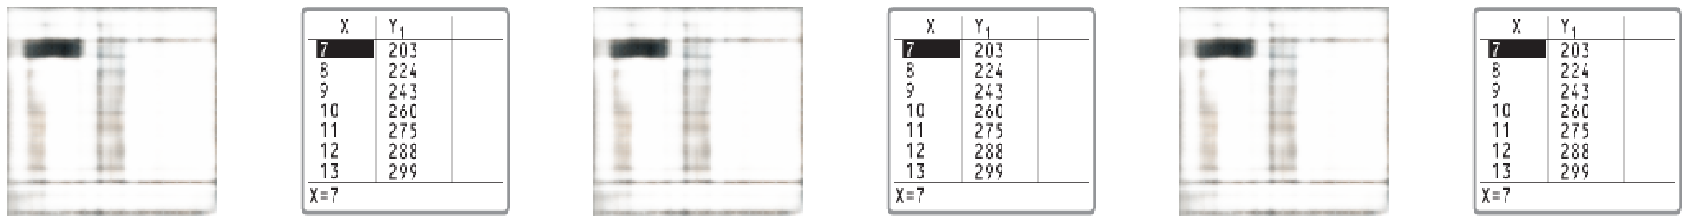

In [10]:
a=[]
fig = plt.figure(figsize=(30, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
k=1
for i in range(3):
    z_points_2 = ae.encoder.predict(example_images_2)
    reconst_images = ae.decoder.predict(z_points_2)
    img = reconst_images[0].squeeze()
    sub = fig.add_subplot(2, 6, k)
    k+=1
    sub.axis('off')        
    sub.imshow(img)
    img2 = example_images_2[0].squeeze()
    sub2 = fig.add_subplot(2, 6, k)
    k+=1
    sub2.axis('off')        
    sub2.imshow(img2)
    a.extend(z_points_2)

In [11]:
a=np.array(a)

In [13]:
z=cosine_similarity(a[1].reshape(1,200),a[0].reshape(1,200))
z

array([[1.]], dtype=float32)